In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import  load_boston

In [4]:
boston_dataset=load_boston()
boston_dataset.feature_names
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston=pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)

In [7]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
boston["MEDV"]=boston_dataset.target

In [9]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
import seaborn as sns

## 畫出房價

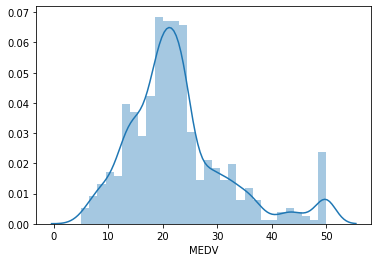

In [12]:
sns.distplot(boston.MEDV,bins=30)

## 刪掉不必要的欄位

In [14]:
boston.drop(["ZN","CHAS","RAD","B"],axis=1,inplace=True)

In [15]:
boston.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,5.33,36.2


## 建立數據分析

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [19]:
X=boston.loc[:,"CRIM":"LSTAT"].values
Y=boston.MEDV
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [20]:
model.fit(x_train,y_train)
y_predict=model.predict(x_test)

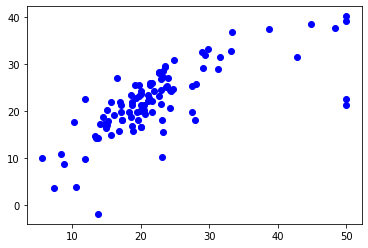

In [21]:
plt.figure(figsize=(6,4))
plt.scatter(y_test,y_predict,c="b")